### レンズ

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
import math
import RayMatrix as rmat
import importlib
importlib.reload(rmat)
#math.atan2?

<module 'RayMatrix' from '/Users/norifumi/Git/differential/RayMatrix.py'>

In [5]:
# 球面を描く
def plot_sphere(R, cx, plotm):
    x = []
    y = []
    if R < 10:
        print("R must be >= 10")
        return
    # x^2 + y^2 = R^2
    for yi in range(-100, 100):
        yf = yi / 10.0
        x.append(-math.sqrt(R*R - yf*yf) + cx)
        y.append(yf)
    plotm.plot(x,y, 'b')
    plotm.plot(cx, 0, 'b.')

In [6]:
def snell(n1, n2, rad1):
    sin2 = math.sin(rad1) * n2 / n1
    if sin2 <= 1.0 and sin2 >= -1.0:
        return math.asin(sin2)
    else:
        return -rad1

In [7]:
def lens_theta(R, y, n1, n2):
    if y < 0 or y > R:
        print("invalid y")
        return -999
    x = math.sqrt(R*R - y*y)
    angle = math.atan2(y, x)
    incid = angle
    refra = snell(n1, n2, incid)
    return - (math.radians(90) - refra)

In [8]:
# 屈折率n
#WATER_N = 1.333
GLASS_N = 1.5
AIR_N = 1.0

In [ ]:
# pyで保存。
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'Lens.ipynb'])

θ:-9.55
f:40.00


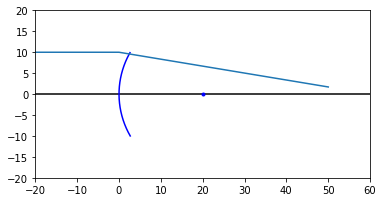

In [34]:
R = 20
y1  = 10
y2 = 5
plot_sphere(R, R, plt)
#plt.plot([-50, 0, 50], [y1, y1, y1 + 50*math.sin(lens_theta(R, y1, AIR_N, GLASS_N))])
y, th = rmat.refracLConvex(y1, 0.0, AIR_N, GLASS_N, R)
print("θ:{0:.2f}".format(math.degrees(th)))
print("f:{0:.2f}".format(rmat.focusLConvex(AIR_N, GLASS_N, R)))
plt.plot([-50, 0, 50], [y1, y1, y1 + 50*math.sin(th)])
#plt.plot([-50, 0, 50], [10, 0, -10])
#plt.plot([-50, 0, 50], [y2, y2, y2 + 50*math.sin(lens_theta(R, y2, AIR_N, GLASS_N))])
plt.xlim(-20, 60)
plt.ylim(-20, 20)
plt.hlines([0], -50, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()